# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_lat = sinasc_raw[['munResLat', 'QTDFILVIVO', 'QTDFILMORT']]
latitude = ['abaixo de -10.5' if lat <= -10.5 else 'acima de -10.5' for lat in sinasc_lat['munResLat']]
sinasc_lat['faixas_lat'] = latitude

C:\Users\marce\AppData\Local\Temp\ipykernel_1932\1022054500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_lat['faixas_lat'] = latitude


In [5]:
sinasc_lat.groupby('faixas_lat').aggregate([sum, 'min', max, np.mean, np.median, np.std,np.var])

munResLat                                           \
                          sum       min       max       mean    median   
faixas_lat                                                               
abaixo de -10.5 -150874.73529 -13.49976 -10.56842 -11.612001 -11.52855   
acima de -10.5  -129611.14031 -10.43595  -8.76889  -9.235509  -8.76889   

                                    QTDFILVIVO             ...         \
                      std       var        sum  min   max  ... median   
faixas_lat                                                 ...          
abaixo de -10.5  0.738864  0.545920    12600.0  0.0  30.0  ...    1.0   
acima de -10.5   0.639948  0.409534    14227.0  0.0  12.0  ...    1.0   

                                    QTDFILMORT                              \
                      std       var        sum  min   max      mean median   
faixas_lat                                                                   
abaixo de -10.5  1.138300  1.295727     3105.0  0.0  28.0  0.242521    0.0   
acima de -10.5   1.198566  1.436561     3539.0  0.0   9.0  0.291828    0.0   

                                     
                      std       var  
faixas_lat                           
abaixo de -10.5  0.599430  0.359317  
acima de -10.5   0.627863  0.394212  

[2 rows x 21 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_area = sinasc_raw[['munResArea', 'PESO', 'CONSULTAS']]
sinasc_area['AREA'] =['abaixo de 3000' if area < 3000 else 'acima de 3000' for area in sinasc_area['munResArea']]

C:\Users\marce\AppData\Local\Temp\ipykernel_1932\643880430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_area['AREA'] =['abaixo de 3000' if area < 3000 else 'acima de 3000' for area in sinasc_area['munResArea']]


In [7]:
sinasc_area.groupby('AREA').aggregate([min, max, sum, np.median, np.mean, np.std, np.var])

munResArea                                                    \
                      min        max           sum     median          mean   
AREA                                                                          
abaixo de 3000    459.978   2944.128  9.665178e+06   1758.465   1851.921453   
acima de 3000    3029.189  34096.394  3.877074e+08  10959.767  17778.218601   

                                           PESO                  ...  \
                         std           var  min   max       sum  ...   
AREA                                                             ...   
abaixo de 3000    709.884005  5.039353e+05  258  5720  16796616  ...   
acima de 3000   13554.195564  1.837162e+08  292  5985  70860341  ...   

                                                       CONSULTAS             \
                       mean         std            var       min max    sum   
AREA                                                                          
abaixo de 3000  3218.359073  531.583103  282580.595074         1   9  19520   
acima de 3000   3249.132973  547.704072  299979.751026         1   9  77143   

                                                     
               median      mean       std       var  
AREA                                                 
abaixo de 3000    4.0  3.740180  0.607492  0.369046  
acima de 3000     4.0  3.537209  0.821128  0.674250  

[2 rows x 21 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_raw.munResAlt.mean()

179.11199911199913

In [9]:
sinasc_altitude = sinasc_raw[['munResAlt', 'APGAR1', 'APGAR5']]
sinasc_altitude['Altitude'] = ['Abaixo de 179' if alt < 179 else 'Acima de 179' for alt in sinasc_altitude['munResAlt']]

C:\Users\marce\AppData\Local\Temp\ipykernel_1932\852629651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_altitude['Altitude'] = ['Abaixo de 179' if alt < 179 else 'Acima de 179' for alt in sinasc_altitude['munResAlt']]


In [10]:
sinasc_altitude.groupby('Altitude').agg([min, max, sum, np.mean, np.median, np.std,np.var])

munResAlt                                                   \
                    min    max        sum        mean median         std   
Altitude                                                                   
Abaixo de 179      85.0  178.0  2346431.0  122.503446  133.0   34.835405   
Acima de 179      182.0  595.0  2494429.0  316.833355  252.0  149.459744   

                            APGAR1                  ...                   \
                        var    min   max       sum  ... median       std   
Altitude                                            ...                    
Abaixo de 179   1213.505470    0.0  10.0  155554.0  ...    8.0  0.996443   
Acima de 179   22338.215112    0.0  10.0   63604.0  ...    8.0  0.955128   

                        APGAR5                                             \
                    var    min   max       sum      mean median       std   
Altitude                                                                    
Abaixo de 179  0.992898    0.0  10.0  175382.0  9.196749    9.0  0.779604   
Acima de 179   0.912269    0.0  10.0   71767.0  9.136474    9.0  0.815069   

                         
                    var  
Altitude                 
Abaixo de 179  0.607782  
Acima de 179   0.664337  

[2 rows x 21 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [11]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='utf-8')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

In [12]:
dados_ro.columns

Index(['municipio', 'regiao', 'idh', 'ifdm', 'pib'], dtype='object')

In [13]:
regioes_map

{"Alta Floresta D'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Alto Para�so': 'Ariquemes',
 "Alvorada D'Oeste": 'Ji-Paran�',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cabixi': 'Vilhena',
 'Cacaul�ndia': 'Ariquemes',
 'Cacoal': 'Cacoal',
 'Campo Novo de Rond�nia': 'Ariquemes',
 'Candeias do Jamari': 'Porto Velho',
 'Castanheiras': 'Cacoal',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena',
 'Costa Marques': 'Ji-Paran�',
 'Cujubim': 'Ariquemes',
 "Espig�o D'Oeste": 'Cacoal',
 'Governador Jorge Teixeira': 'Jaru',
 'Guajar�-Mirim': 'Porto Velho',
 'Itapu� do Oeste': 'Porto Velho',
 'Jaru': 'Jaru',
 'Ji-Paran�': 'Ji-Paran�',
 "Machadinho D'Oeste": 'Jaru',
 'Ministro Andreazza': 'Cacoal',
 'Mirante da Serra': 'Ji-Paran�',
 'Monte Negro': 'Ariquemes',
 "Nova Brasil�ndia D'Oeste": 'Cacoal',
 'Nova Mamor�': 'Porto Velho',
 'Nova Uni�o': 'Ji-Paran�',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Ouro Preto do Oeste'

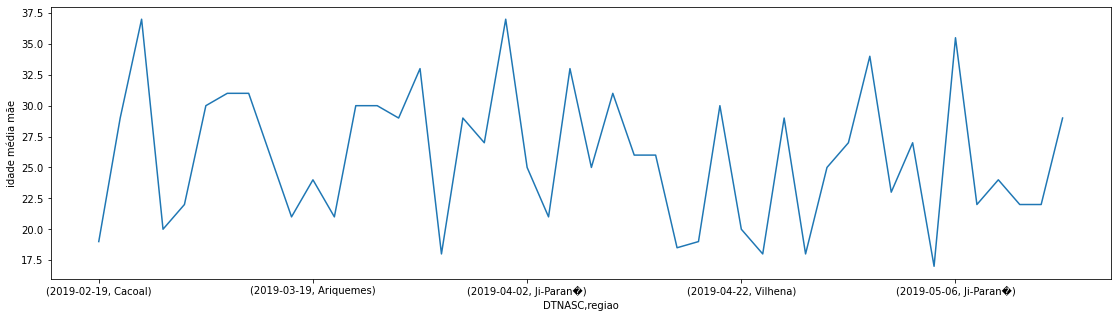

In [14]:
sinasc_raw.groupby(['DTNASC', dados_ro['regiao']])['IDADEMAE'].mean().plot(figsize=[19,5])
plt.ylabel('idade média mãe')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [53]:
idh_ro = dados_ro.set_index('municipio')
mapping = regioes_map
idh_ro.groupby(mapping)[['idh']].aggregate(['mean', 'std', min, max])

idh                        
                 mean       std    min    max
municipio                                    
Ariquemes    0.630500  0.033912  0.593  0.702
Cacoal       0.655929  0.035350  0.592  0.718
Jaru         0.610800  0.044008  0.584  0.689
Ji-Paran�    0.636769  0.035506  0.587  0.714
Porto Velho  0.648600  0.056350  0.587  0.736
Vilhena      0.669714  0.037478  0.613  0.731

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [56]:
ifdm_ro = dados_ro.set_index('municipio')
mapping = regioes_map
idh_ro.groupby(mapping)[['ifdm']].aggregate(['mean', 'std', min, max])

ifdm                          
                 mean       std     min     max
municipio                                      
Ariquemes    0.602175  0.083157  0.5055  0.7746
Cacoal       0.616614  0.068082  0.5046  0.7383
Jaru         0.548980  0.068312  0.4562  0.6450
Ji-Paran�    0.610092  0.046444  0.5519  0.7117
Porto Velho  0.599680  0.081834  0.5084  0.7257
Vilhena      0.642686  0.058050  0.5759  0.7465

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [57]:
pib_ro = dados_ro.set_index('municipio')
mapping = regioes_map
pib_ro.groupby(mapping)[['pib']].aggregate(['mean', 'std', min,max]).round(2)

pib                              
                   mean         std     min       max
municipio                                            
Ariquemes     583786.50   831837.77   76854   2579830
Cacoal        507847.21   644744.81   52908   2261644
Jaru          505545.20   597542.76  105208   1500890
Ji-Paran�     552127.08   996746.59   72089   3783972
Porto Velho  4002284.20  7780507.43  129351  17912070
Vilhena       605930.14   992058.96   76756   2831175

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

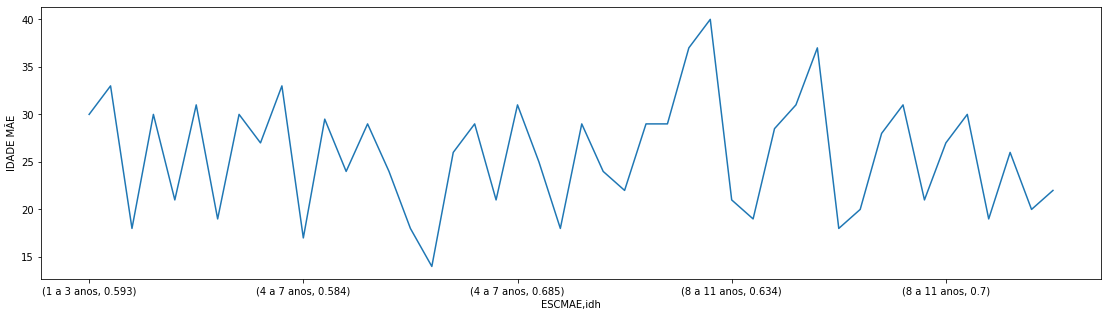

In [80]:
sinasc_raw.groupby(['ESCMAE', dados_ro['idh']])['IDADEMAE'].median().plot(figsize=[19,5])
plt.ylabel('IDADE MÃE')
plt.show()

Pelo gráfico acima nota-se que quanto maior o pib da região maior é a escolaridade da mãe

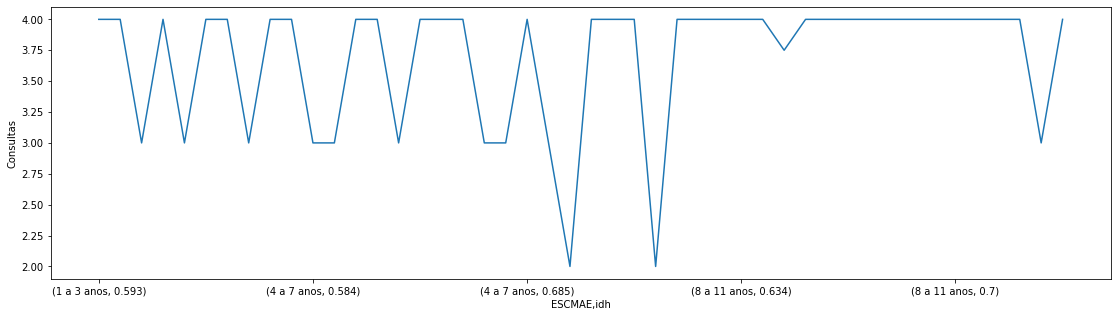

In [97]:
sinasc_raw.groupby(['ESCMAE', dados_ro['idh']])['CONSULTAS'].mean().plot(figsize=[19,5])
plt.ylabel('Consultas')
plt.show()

A média de consultas é maior de acordo com o nível de escolaridade da mãe, se mantém regular a partir de 8 a 11 anos de estudo da mãe